# Лабораторная работа 3. Описательная статистика

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats
from scipy.stats import pearsonr, spearmanr, kendalltau, norm
import scipy.stats as sts

In [2]:
df=pd.read_csv('CO2_emission.csv')
values = ['Compact', 'Full-size', 'Mid-size', 'Minicompact', 'Minivan', 'Pickup truck: Small','Pickup truck: Standard','Pickup truck: Standard','Station wagon: Mid-size','Special purpose vehicle','Station wagon: Small','Subcompact','Two-seater','Van: Passenger']

#drop rows that contain any value in the list
#df = df[df.Vehicle_Class.isin (values) == False ]
#df["Vehicle_Class"] = np.where(df["Vehicle_Class"] == "SUV: Small", 0, 1)
df = df.drop(columns=['Model_Year'])
df = df.drop(columns=['Make'])
df = df.drop(columns=['Model'])
df = df.drop(columns=['Transmission'])
df = df.drop(columns=['Vehicle_Class'])
#df = df.drop(columns=['Smog_Level'])
print(df.head(10))

   Engine_Size  Cylinders  Fuel_Consumption_in_City(L/100 km)  \
0          2.4          4                                 9.9   
1          3.5          6                                11.1   
2          2.0          4                                11.0   
3          2.0          4                                11.3   
4          2.0          4                                11.2   
5          2.0          4                                11.3   
6          2.0          4                                10.0   
7          2.0          4                                10.5   
8          2.9          6                                13.5   
9          2.0          4                                10.3   

   Fuel_Consumption_in_City_Hwy(L/100 km)  Fuel_Consumption_comb(L/100km)  \
0                                     7.0                             8.6   
1                                    10.8                            11.0   
2                                     8.6            

## Центральные метрики

### Математическое ожидание

In [3]:
print('Engine_Size:', st.mean(df['Engine_Size']))
print('Cylinders:', st.mean(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', st.mean(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', st.mean(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', st.mean(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', st.mean(df['CO2_Emissions']))
print('Smog_Level:', st.mean(df['Smog_Level']))

Engine_Size: 3.214866310160428
Cylinders: 5.716577540106952
Fuel_Consumption_in_City(L/100 km): 12.498609625668449
Fuel_Consumption_in_City_Hwy(L/100 km): 9.30620320855615
Fuel_Consumption_comb(L/100km): 11.060213903743316
CO2_Emissions: 258.52941176470586
Smog_Level: 4.72620320855615


### Средневзвешенное

In [4]:
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Engine_Size:', np.average(df_head['Engine_Size'], weights=w))
print('Cylinders:', np.average(df_head['Cylinders'], weights=w))
print('Fuel_Consumption_in_City(L/100 km):', np.average(df_head['Fuel_Consumption_in_City(L/100 km)'], weights=w))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', np.average(df_head['Fuel_Consumption_in_City_Hwy(L/100 km)'], weights=w))
print('Fuel_Consumption_comb(L/100km):', np.average(df_head['Fuel_Consumption_comb(L/100km)'], weights=w))
print('CO2_Emissions:', np.average(df_head['CO2_Emissions'], weights=w))
print('Smog_Level:', np.average(df_head['Smog_Level'], weights=w))

Engine_Size: 2.34
Cylinders: 4.3999999999999995
Fuel_Consumption_in_City(L/100 km): 11.015
Fuel_Consumption_in_City_Hwy(L/100 km): 8.915
Fuel_Consumption_comb(L/100km): 10.075000000000001
CO2_Emissions: 235.7
Smog_Level: 5.25


### Медиана

In [5]:
print('Engine_Size:', 'aver:', st.median(df['Engine_Size']), 'low:', st.median_low(df['Engine_Size']), 'high:', st.median_high(df['Engine_Size']))
print('Cylinders:', 'aver:', st.median(df['Cylinders']), 'low:', st.median_low(df['Cylinders']), 'high:', st.median_high(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', 'aver:', st.median(df['Fuel_Consumption_in_City(L/100 km)']), 'low:', st.median_low(df['Fuel_Consumption_in_City(L/100 km)']), 'high:', st.median_high(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', 'aver:', st.median(df['Fuel_Consumption_in_City_Hwy(L/100 km)']), 'low:', st.median_low(df['Fuel_Consumption_in_City_Hwy(L/100 km)']), 'high:', st.median_high(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', 'aver:', st.median(df['Fuel_Consumption_comb(L/100km)']), 'low:', st.median_low(df['Fuel_Consumption_comb(L/100km)']), 'high:', st.median_high(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', 'aver:', st.median(df['CO2_Emissions']), 'low:', st.median_low(df['CO2_Emissions']), 'high:', st.median_high(df['CO2_Emissions']))
print('Smog_Level:', 'aver:', st.median(df['Smog_Level']), 'low:', st.median_low(df['Smog_Level']), 'high:', st.median_high(df['Smog_Level']))

Engine_Size: aver: 3.0 low: 3.0 high: 3.0
Cylinders: aver: 6 low: 6 high: 6
Fuel_Consumption_in_City(L/100 km): aver: 12.0 low: 12.0 high: 12.0
Fuel_Consumption_in_City_Hwy(L/100 km): aver: 9.0 low: 9.0 high: 9.0
Fuel_Consumption_comb(L/100km): aver: 10.7 low: 10.7 high: 10.7
CO2_Emissions: aver: 255 low: 255 high: 255
Smog_Level: aver: 5 low: 5 high: 5


### Мода

In [6]:
print('Engine_Size:', st.mode(df['Engine_Size']))
print('Cylinders:', st.mode(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', st.mode(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', st.mode(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', st.mode(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', st.mode(df['CO2_Emissions']))
print('Smog_Level:', st.mode(df['Smog_Level']))

Engine_Size: 2.0
Cylinders: 4
Fuel_Consumption_in_City(L/100 km): 13.1
Fuel_Consumption_in_City_Hwy(L/100 km): 9.8
Fuel_Consumption_comb(L/100km): 13.8
CO2_Emissions: 242
Smog_Level: 5


### Минимум и максимум

In [7]:
print('Engine_Size:', 'min:', np.min(df['Engine_Size']), 'max:', np.max(df['Engine_Size']))
print('Cylinders:', 'min:', np.min(df['Cylinders']), 'max:', np.max(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', 'min:', np.min(df['Fuel_Consumption_in_City(L/100 km)']), 'max:', np.max(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', 'min:', np.min(df['Fuel_Consumption_in_City_Hwy(L/100 km)']), 'max:', np.max(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', 'min:', np.min(df['Fuel_Consumption_comb(L/100km)']), 'max:', np.max(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', 'min:', np.min(df['CO2_Emissions']), 'max:', np.max(df['CO2_Emissions']))
print('Smog_Level:', 'min:', np.min(df['Smog_Level']), 'max:', np.max(df['Smog_Level']))

Engine_Size: min: 1.0 max: 8.0
Cylinders: min: 3 max: 16
Fuel_Consumption_in_City(L/100 km): min: 4.0 max: 30.3
Fuel_Consumption_in_City_Hwy(L/100 km): min: 3.9 max: 20.9
Fuel_Consumption_comb(L/100km): min: 4.0 max: 26.1
CO2_Emissions: min: 94 max: 608
Smog_Level: min: 1 max: 7


## Метрики оценки вариативности данных

### Дисперсия

In [8]:
print('Engine_Size:', st.pvariance(df['Engine_Size']))
print('Cylinders:', st.pvariance(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', st.pvariance(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', st.pvariance(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', st.pvariance(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', st.pvariance(df['CO2_Emissions']))
print('Smog_Level:', st.pvariance(df['Smog_Level']))

Engine_Size: 1.9259073350682032
Cylinders: 3.9057679659126654
Fuel_Consumption_in_City(L/100 km): 12.148051542795047
Fuel_Consumption_in_City_Hwy(L/100 km): 4.904603231433556
Fuel_Consumption_comb(L/100km): 8.2110587777746
CO2_Emissions: 4148.428814092482
Smog_Level: 2.9282438731447855


### Стандартное отклонение

In [9]:
print('Engine_Size:', st.pstdev(df['Engine_Size']))
print('Cylinders:', st.pstdev(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', st.pstdev(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', st.pstdev(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', st.pstdev(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', st.pstdev(df['CO2_Emissions']))
print('Smog_Level:', st.pstdev(df['Smog_Level']))

Engine_Size: 1.387770634891877
Cylinders: 1.9763015877928818
Fuel_Consumption_in_City(L/100 km): 3.4854055062209115
Fuel_Consumption_in_City_Hwy(L/100 km): 2.2146338820296134
Fuel_Consumption_comb(L/100km): 2.8654945084181542
CO2_Emissions: 64.4082977114943
Smog_Level: 1.7112112298441666


### Квантиль (процентиль)

#### 5-й

In [10]:
print('Engine_Size:', np.percentile(df['Engine_Size'], 5))
print('Cylinders:', np.percentile(df['Cylinders'], 5))
print('Fuel_Consumption_in_City(L/100 km):', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], 5))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', np.percentile(df['Fuel_Consumption_in_City_Hwy(L/100 km)'], 5))
print('Fuel_Consumption_comb(L/100km):', np.percentile(df['Fuel_Consumption_comb(L/100km)'], 5))
print('CO2_Emissions:', np.percentile(df['CO2_Emissions'], 5))
print('Smog_Level:', np.percentile(df['Smog_Level'], 5))

Engine_Size: 1.5
Cylinders: 4.0
Fuel_Consumption_in_City(L/100 km): 7.9
Fuel_Consumption_in_City_Hwy(L/100 km): 6.3
Fuel_Consumption_comb(L/100km): 7.1
CO2_Emissions: 167.0
Smog_Level: 1.0


#### 95-й

In [11]:
print('Engine_Size:', np.percentile(df['Engine_Size'], 95))
print('Cylinders:', np.percentile(df['Cylinders'], 95))
print('Fuel_Consumption_in_City(L/100 km):', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], 95))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', np.percentile(df['Fuel_Consumption_in_City_Hwy(L/100 km)'], 95))
print('Fuel_Consumption_comb(L/100km):', np.percentile(df['Fuel_Consumption_comb(L/100km)'], 95))
print('CO2_Emissions:', np.percentile(df['CO2_Emissions'], 95))
print('Smog_Level:', np.percentile(df['Smog_Level'], 95))

Engine_Size: 6.2
Cylinders: 8.0
Fuel_Consumption_in_City(L/100 km): 18.0
Fuel_Consumption_in_City_Hwy(L/100 km): 13.0
Fuel_Consumption_comb(L/100km): 15.7
CO2_Emissions: 359.0
Smog_Level: 7.0


#### 25-й, 50-й, 75-й

In [12]:
print('Engine_Size:', np.percentile(df['Engine_Size'], [25,50,75]))
print('Cylinders:', np.percentile(df['Cylinders'], [25,50,75]))
print('Fuel_Consumption_in_City(L/100 km):', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], [25,50,75]))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', np.percentile(df['Fuel_Consumption_in_City_Hwy(L/100 km)'], [25,50,75]))
print('Fuel_Consumption_comb(L/100km):', np.percentile(df['Fuel_Consumption_comb(L/100km)'], [25,50,75]))
print('CO2_Emissions:', np.percentile(df['CO2_Emissions'], [25,50,75]))
print('Smog_Level:', np.percentile(df['Smog_Level'], [25,50,75]))

Engine_Size: [2. 3. 4.]
Cylinders: [4. 6. 8.]
Fuel_Consumption_in_City(L/100 km): [10.1 12.  14.8]
Fuel_Consumption_in_City_Hwy(L/100 km): [ 7.7  9.  10.8]
Fuel_Consumption_comb(L/100km): [ 9.1 10.7 13.1]
CO2_Emissions: [213.  255.  303.5]
Smog_Level: [3. 5. 6.]


### Размах

In [13]:
print('Engine_Size:', max(df['Engine_Size'])-min(df['Engine_Size']))
print('Cylinders:', max(df['Cylinders'])-min(df['Cylinders']))
print('Fuel_Consumption_in_City(L/100 km):', max(df['Fuel_Consumption_in_City(L/100 km)'])-min(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City_Hwy(L/100 km):', max(df['Fuel_Consumption_in_City_Hwy(L/100 km)'])-min(df['Fuel_Consumption_in_City_Hwy(L/100 km)']))
print('Fuel_Consumption_comb(L/100km):', max(df['Fuel_Consumption_comb(L/100km)'])-min(df['Fuel_Consumption_comb(L/100km)']))
print('CO2_Emissions:', max(df['CO2_Emissions'])-min(df['CO2_Emissions']))
print('Smog_Level:', max(df['Smog_Level'])-min(df['Smog_Level']))

Engine_Size: 7.0
Cylinders: 13
Fuel_Consumption_in_City(L/100 km): 26.3
Fuel_Consumption_in_City_Hwy(L/100 km): 17.0
Fuel_Consumption_comb(L/100km): 22.1
CO2_Emissions: 514
Smog_Level: 6


### Корреляция

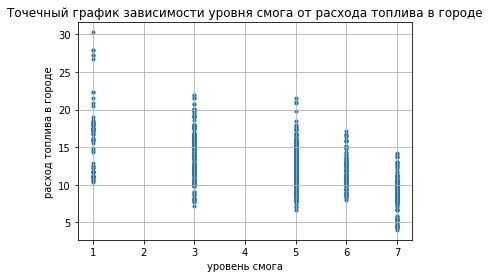

In [14]:
plt.ylabel('расход топлива в городе')
plt.xlabel('уровень смога')
plt.title('Точечный график зависимости уровня смога от расхода топлива в городе')
plt.grid(True)
plt.scatter(df['Smog_Level'], df['Fuel_Consumption_in_City(L/100 km)'], marker='.')
plt.show()

### Описательная статистика Pandas

In [15]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


### Корреляция Пирсона

Коэффициент корреляции Пирсона: -0.5045441452332151


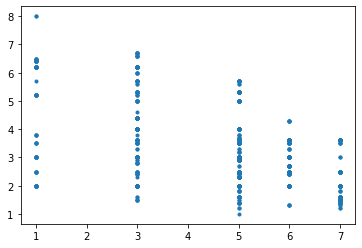

In [16]:
corr, p_value = pearsonr(df['Smog_Level'], df['Engine_Size'])
plt.scatter(df['Smog_Level'], df['Engine_Size'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.5732100061649237


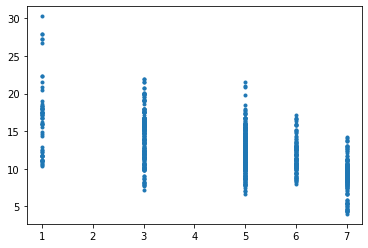

In [17]:
corr, p_value = pearsonr(df['Smog_Level'], df['Fuel_Consumption_in_City(L/100 km)'])
plt.scatter(df['Smog_Level'], df['Fuel_Consumption_in_City(L/100 km)'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

### Корреляция Спирмана

In [18]:
cor, p_value = sts.spearmanr(df['Smog_Level'], df['Fuel_Consumption_in_City(L/100 km)'])
print(cor)

-0.5669165873458611


In [19]:
cor, p_value = sts.spearmanr(df['Smog_Level'], df['Engine_Size'])
print(cor)

-0.4945581372163635


### Тау Кендалла

In [20]:
cor, p_value = sts.kendalltau(df['Smog_Level'], df['Fuel_Consumption_in_City(L/100 km)'])
print(cor)

-0.4484676056668564


In [21]:
cor, p_value = sts.kendalltau(df['Smog_Level'], df['Engine_Size'])
print(cor)

-0.3977744733148557


### Корреляция Pandas

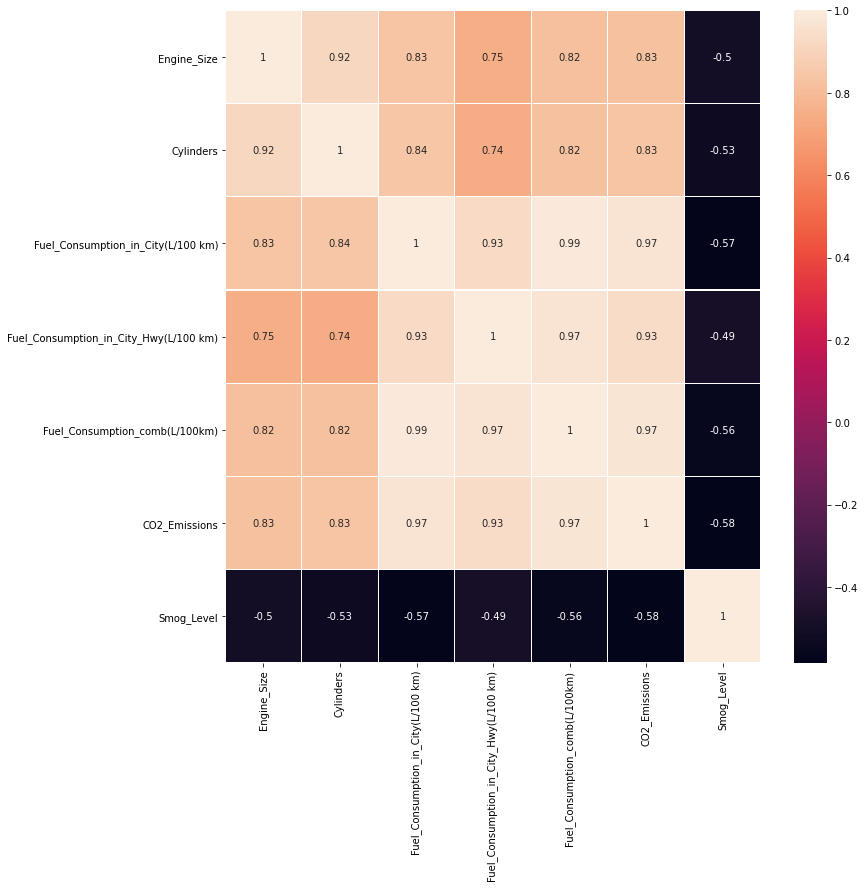

In [22]:
sns.heatmap(df.corr(),annot=True,linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)


Корреляции межу показателями : 

    Engine_Size и Cylinders : 0.92 - сильная положительная
    Engine_Size и Fuel_Consumption_in_City(L/100 km) : 0.83 - сильная положительная
    Engine_Size и Fuel_Consumption_in_Hwy(L/100 km) : 0.75 - сильная положительная
    Engine_Size и Fuel_Consumption_in_comb(L/100 km) : 0.82 - сильная положительная
    Engine_Size и CO2_Emissions : 0.83 - сильная положительная
    Engine_Size и Smog_level : -0.5 - умеренная отрицательная
        
    Cylinders и Fuel_Consumption_in_City(L/100 km): 0.84 - сильная положительная
    Cylinders и Fuel_Consumption_in_Hwy(L/100 km): 0.74 - сильная положительная
    Cylinders и Fuel_Consumption_in_comb(L/100 km): 0.82 - сильная положительная
    Cylinders и CO2_Emissions: 0.83 - сильная положительная
    Cylinders и Smog_level: -0.53 - умеренная отрицательная
        
    Fuel_Consumption_in_City(L/100 km) и Fuel_Consumption_in_Hwy(L/100 km): 0.93 - сильная положительная
    Fuel_Consumption_in_City(L/100 km) и Fuel_Consumption_comb(L/100 km):0.99 - сильная положительная
    Fuel_Consumption_in_City(L/100 km) и CO2_Emissions: 0.97 - сильная положительная
    Fuel_Consumption_in_City(L/100 km) и Smog_level: -0.57 - умеренная отрицательная
    
    Fuel_Consumption_in_Hwy(L/100 km) и Fuel_Consumption_comb(L/100 km): 0.97 - сильная положительная
    Fuel_Consumption_in_Hwy(L/100 km) и CO2_Emissions: 0.93 - сильная положительная
    Fuel_Consumption_in_Hwy(L/100 km) и Smog_level: -0.49 - умеренная отрицательная
    
    Fuel_Consumption_comb(L/100 km) и CO2_Emissions: 0.97 - сильная положительная
    Fuel_Consumption_comb(L/100 km) и Smog_level: -0.56 - умеренная отрицательная
    
    CO2_Emissions и Smog_level: -0.58 - умеренная отрицательная

### Выбросы

In [23]:
df['Smog_Level'].isnull().sum()

0

In [24]:
df['Fuel_Consumption_in_City(L/100 km)'].isnull().sum()

0

#### Нулевых значений в колонках нет

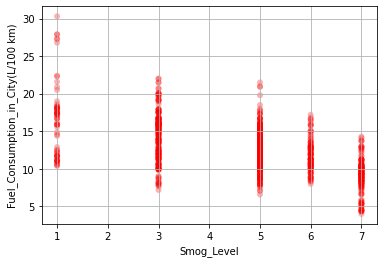

In [25]:
smog = df['Smog_Level']
fuel_cons = df['Fuel_Consumption_in_City(L/100 km)']
fig, ax = plt.subplots()
ax.scatter(smog, fuel_cons, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('Smog_Level')
plt.ylabel('Fuel_Consumption_in_City(L/100 km)')
plt.show()

#### На графике можно увидеть, что имеются некоторые значения, нестандартные для данной выборки

In [26]:
df['Fuel_Consumption_in_City(L/100 km)'][df['Fuel_Consumption_in_City(L/100 km)']>20]

123    26.8
124    30.3
189    21.5
200    22.0
267    20.5
304    20.9
314    21.5
316    21.0
345    21.6
347    22.3
382    21.5
393    22.0
505    20.9
548    27.9
549    27.9
550    27.3
551    27.3
825    22.4
831    20.1
832    20.1
833    20.7
834    20.7
Name: Fuel_Consumption_in_City(L/100 km), dtype: float64

In [27]:
smog_new = df['Smog_Level'][df['Fuel_Consumption_in_City(L/100 km)']<20]
fuel_cons_new = df['Fuel_Consumption_in_City(L/100 km)'][df['Fuel_Consumption_in_City(L/100 km)']<20]

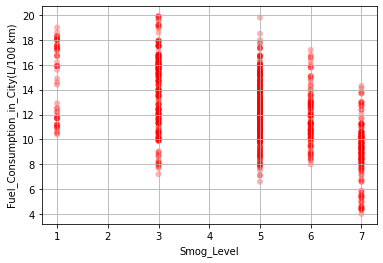

In [28]:
fig, ax = plt.subplots()
ax.scatter(smog_new, fuel_cons_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Smog_Level')
plt.ylabel('Fuel_Consumption_in_City(L/100 km)')
plt.show()

### Коэффициент островершинности (куртосис)

In [29]:
print('Fuel_Consumption_in_City(L/100 km):', sts.kurtosis(df['Fuel_Consumption_in_City(L/100 km)'], axis=0, fisher=True, bias=True))
print('Engine_Size:', sts.kurtosis(df['Engine_Size'], axis=0, fisher=True, bias=True))
print('Smog_Level:', sts.kurtosis(df['Smog_Level'], axis=0, fisher=True, bias=True))

Fuel_Consumption_in_City(L/100 km): 1.850644083679402
Engine_Size: -0.10129720650956342
Smog_Level: -0.5295869373965325


### Коэффициент асимметрии

In [30]:
print('Fuel_Consumption_in_City(L/100 km):', sts.skew(df['Fuel_Consumption_in_City(L/100 km)'], axis=0, bias=True))
print('Engine_Size:', sts.skew(df['Engine_Size'], axis=0, bias=True))
print('Smog_Level:', sts.skew(df['Smog_Level'], axis=0, bias=True))

Fuel_Consumption_in_City(L/100 km): 0.7490480694538997
Engine_Size: 0.8762254820876445
Smog_Level: -0.4874813254716418


In [31]:
print('Fuel_Consumption_in_City(L/100 km) (мат. ожидание):', st.mean(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City(L/100 km) (медиана):', 'aver:', st.median(df['Fuel_Consumption_in_City(L/100 km)']), 'low:', st.median_low(df['Fuel_Consumption_in_City(L/100 km)']), 'high:', st.median_high(df['Fuel_Consumption_in_City(L/100 km)']))
print('Fuel_Consumption_in_City(L/100 km) (мода):', st.mode(df['Fuel_Consumption_in_City(L/100 km)']))

Fuel_Consumption_in_City(L/100 km) (мат. ожидание): 12.498609625668449
Fuel_Consumption_in_City(L/100 km) (медиана): aver: 12.0 low: 12.0 high: 12.0
Fuel_Consumption_in_City(L/100 km) (мода): 13.1


In [32]:
print('Engine_Size:')
print('Мат. ожидание:', st.mean(df['Engine_Size']))
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Средневзвешенное:', np.average(df_head['Engine_Size'], weights=w))
print('Медиана:', 'aver:', st.median(df['Engine_Size']), 'low:', st.median_low(df['Engine_Size']), 'high:', st.median_high(df['Engine_Size']))
print('Мода:', st.mode(df['Engine_Size']))
print('Минимальное и максимальное:', 'min:', np.min(df['Engine_Size']), 'max:', np.max(df['Engine_Size']))
print('Дисперсия:', st.pvariance(df['Engine_Size']))
print('Стандартное отклонение:', st.pstdev(df['Engine_Size']))
print('Процентиль 5:', np.percentile(df['Engine_Size'], 5))
print('Процентиль 95:', np.percentile(df['Engine_Size'], 95))
print('Процентиль 25 50 75:', np.percentile(df['Engine_Size'], [25,50,75]))
print('Размах:', max(df['Engine_Size'])-min(df['Engine_Size']))

Engine_Size:
Мат. ожидание: 3.214866310160428
Средневзвешенное: 2.34
Медиана: aver: 3.0 low: 3.0 high: 3.0
Мода: 2.0
Минимальное и максимальное: min: 1.0 max: 8.0
Дисперсия: 1.9259073350682032
Стандартное отклонение: 1.387770634891877
Процентиль 5: 1.5
Процентиль 95: 6.2
Процентиль 25 50 75: [2. 3. 4.]
Размах: 7.0


In [33]:
print('Fuel_Consumption_in_City(L/100 km):')
print('Мат. ожидание:', st.mean(df['Fuel_Consumption_in_City(L/100 km)']))
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Средневзвешенное:', np.average(df_head['Fuel_Consumption_in_City(L/100 km)'], weights=w))
print('Медиана:', 'aver:', st.median(df['Fuel_Consumption_in_City(L/100 km)']), 'low:', st.median_low(df['Fuel_Consumption_in_City(L/100 km)']), 'high:', st.median_high(df['Fuel_Consumption_in_City(L/100 km)']))
print('Мода:', st.mode(df['Fuel_Consumption_in_City(L/100 km)']))
print('Минимальное и максимальное:', 'min:', np.min(df['Fuel_Consumption_in_City(L/100 km)']), 'max:', np.max(df['Fuel_Consumption_in_City(L/100 km)']))
print('Дисперсия:', st.pvariance(df['Fuel_Consumption_in_City(L/100 km)']))
print('Стандартное отклонение:', st.pstdev(df['Fuel_Consumption_in_City(L/100 km)']))
print('Процентиль 5:', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], 5))
print('Процентиль 95:', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], 95))
print('Процентиль 25 50 75:', np.percentile(df['Fuel_Consumption_in_City(L/100 km)'], [25,50,75]))
print('Размах:', max(df['Fuel_Consumption_in_City(L/100 km)'])-min(df['Fuel_Consumption_in_City(L/100 km)']))

Fuel_Consumption_in_City(L/100 km):
Мат. ожидание: 12.498609625668449
Средневзвешенное: 11.015
Медиана: aver: 12.0 low: 12.0 high: 12.0
Мода: 13.1
Минимальное и максимальное: min: 4.0 max: 30.3
Дисперсия: 12.148051542795047
Стандартное отклонение: 3.4854055062209115
Процентиль 5: 7.9
Процентиль 95: 18.0
Процентиль 25 50 75: [10.1 12.  14.8]
Размах: 26.3


In [34]:
print('CO2_Emissions:')
print('Мат. ожидание:', st.mean(df['CO2_Emissions']))
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Средневзвешенное:', np.average(df_head['CO2_Emissions'], weights=w))
print('Медиана:', 'aver:', st.median(df['CO2_Emissions']), 'low:', st.median_low(df['CO2_Emissions']), 'high:', st.median_high(df['CO2_Emissions']))
print('Мода:', st.mode(df['CO2_Emissions']))
print('Минимальное и максимальное:', 'min:', np.min(df['CO2_Emissions']), 'max:', np.max(df['CO2_Emissions']))
print('Дисперсия:', st.pvariance(df['CO2_Emissions']))
print('Стандартное отклонение:', st.pstdev(df['CO2_Emissions']))
print('Процентиль 5:', np.percentile(df['CO2_Emissions'], 5))
print('Процентиль 95:', np.percentile(df['CO2_Emissions'], 95))
print('Процентиль 25 50 75:', np.percentile(df['CO2_Emissions'], [25,50,75]))
print('Размах:', max(df['CO2_Emissions'])-min(df['CO2_Emissions']))

CO2_Emissions:
Мат. ожидание: 258.52941176470586
Средневзвешенное: 235.7
Медиана: aver: 255 low: 255 high: 255
Мода: 242
Минимальное и максимальное: min: 94 max: 608
Дисперсия: 4148.428814092482
Стандартное отклонение: 64.4082977114943
Процентиль 5: 167.0
Процентиль 95: 359.0
Процентиль 25 50 75: [213.  255.  303.5]
Размах: 514


In [35]:
print('Smog_Level:')
print('Мат. ожидание:', st.mean(df['Smog_Level']))
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Средневзвешенное:', np.average(df_head['Smog_Level'], weights=w))
print('Медиана:', 'aver:', st.median(df['Smog_Level']), 'low:', st.median_low(df['Smog_Level']), 'high:', st.median_high(df['Smog_Level']))
print('Мода:', st.mode(df['Smog_Level']))
print('Минимальное и максимальное:', 'min:', np.min(df['Smog_Level']), 'max:', np.max(df['Smog_Level']))
print('Дисперсия:', st.pvariance(df['Smog_Level']))
print('Стандартное отклонение:', st.pstdev(df['Smog_Level']))
print('Процентиль 5:', np.percentile(df['Smog_Level'], 5))
print('Процентиль 95:', np.percentile(df['Smog_Level'], 95))
print('Процентиль 25 50 75:', np.percentile(df['Smog_Level'], [25,50,75]))
print('Размах:', max(df['Smog_Level'])-min(df['Smog_Level']))

Smog_Level:
Мат. ожидание: 4.72620320855615
Средневзвешенное: 5.25
Медиана: aver: 5 low: 5 high: 5
Мода: 5
Минимальное и максимальное: min: 1 max: 7
Дисперсия: 2.9282438731447855
Стандартное отклонение: 1.7112112298441666
Процентиль 5: 1.0
Процентиль 95: 7.0
Процентиль 25 50 75: [3. 5. 6.]
Размах: 6
